In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

from pathlib import Path
import seaborn as sns

In [31]:
data_path = Path("/mnt/Data/stable-diffusion")

# Get all folders that start with "run"
runs = [x for x in data_path.iterdir() if x.is_dir() and x.name.startswith("run")]
runs.sort()
print(f"Found {len(runs)} runs.")

Found 240 runs.


In [33]:
# From each run get the config file
configs = [x / "used_config.yaml" for x in runs]
# Pass the config file contents into dictionaries
configs = [yaml.safe_load(x.open()) for x in configs]
# construct a dataframe from the config dictionaries
df = pd.DataFrame(configs)
df.index = [x.name for x in runs]

In [34]:
df.head()

,positive_prompt,dtype,model_id,scheduler_id,num_inference_steps,seed,output_dir,run_prefix,negative_prompts_path,device,attention_slicing,classifier_free_guidance,image_height,image_width,batch_size,guidance_scale,plot_latents,run_duration_sec
run_001,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,10,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,5.0,False,9.595916
run_002,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,5.0,False,4.204301
run_003,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,30,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,5.0,False,5.086426
run_004,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,40,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,5.0,False,5.961106
run_005,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,50,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,5.0,False,6.811813


In [35]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

positive_prompt: 1
dtype: 1
model_id: 2
scheduler_id: 4
num_inference_steps: 5
seed: 1
output_dir: 1
run_prefix: 1
negative_prompts_path: 1
device: 1
attention_slicing: 2
classifier_free_guidance: 1
image_height: 1
image_width: 1
batch_size: 1
guidance_scale: 3
plot_latents: 1
run_duration_sec: 240


<AxesSubplot: xlabel='num_inference_steps', ylabel='run_duration_sec'>

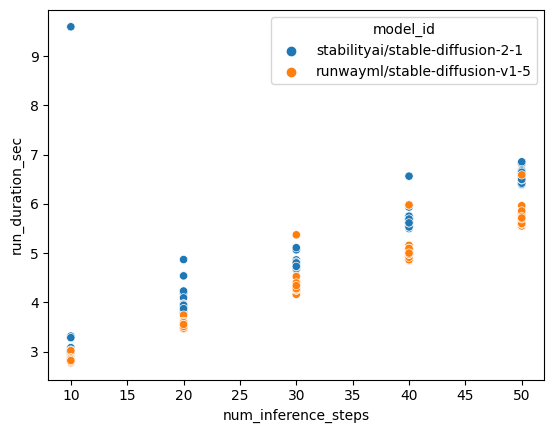

In [36]:
sns.scatterplot(data = df, x="num_inference_steps", y="run_duration_sec", hue="model_id")

In [38]:
# keep only runs with stable-diffusion-2-1 
df_v2 = df[df["model_id"] == "stabilityai/stable-diffusion-2-1"]

# keep only runs with more than 10 inference steps
df_v2 = df_v2[df_v2["num_inference_steps"] > 10]

# fetch the 5 runs with the lowest run duration
df_v2.sort_values("run_duration_sec").head(5)

,positive_prompt,dtype,model_id,scheduler_id,num_inference_steps,seed,output_dir,run_prefix,negative_prompts_path,device,attention_slicing,classifier_free_guidance,image_height,image_width,batch_size,guidance_scale,plot_latents,run_duration_sec
run_027,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,False,True,512,512,1,15.0,False,3.794146
run_022,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,DDIMScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,False,True,512,512,1,10.0,False,3.794452
run_057,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,EulerDiscreteScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,False,True,512,512,1,15.0,False,3.806403
run_047,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,EulerDiscreteScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,False,True,512,512,1,5.0,False,3.828325
run_042,"cityscape, modern, high definition, cinematic",torch.float16,stabilityai/stable-diffusion-2-1,EulerDiscreteScheduler,20,100,/mnt/Data/stable-diffusion,run_,/home/nsirmpilatze/Code/niksirbi/rebootcamp/da...,cuda,True,True,512,512,1,15.0,False,3.856131
